In [1]:
from os import listdir
import numpy as np
from matplotlib import image
import cv2
# load all images in a directory
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C:/Users/admin/Desktop/midvi s3/Image mining/obj_decoys'
for filename in listdir(path):
	# load image
	img_data = image.imread(path+'/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	# Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
  # print(' %s %s ' % (filename, img_data.shape))


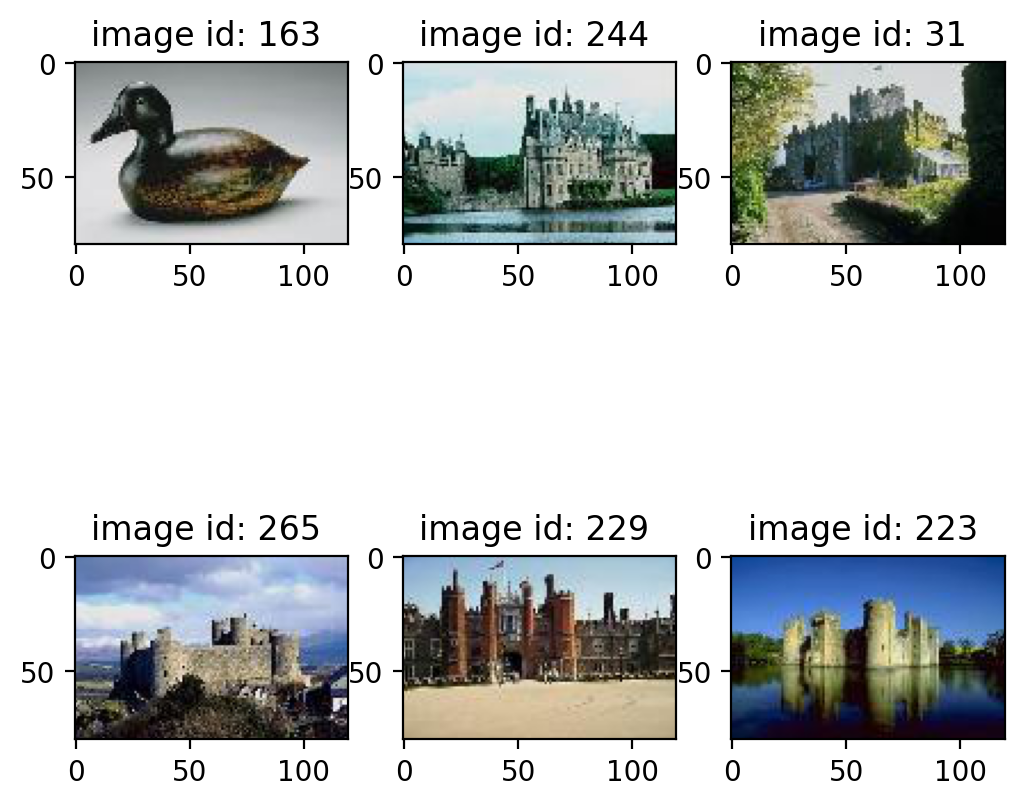

In [2]:
# Afficher les 6 premières images
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6), dpi=200)
import random
id=random.sample(range(270), 6)
for i in range(6):
  ax1 = fig.add_subplot(2, 3, i+1)
  ax1.imshow(loaded_images[id[i]])
  ax1.set_title('image id: %s '% (id[i]))

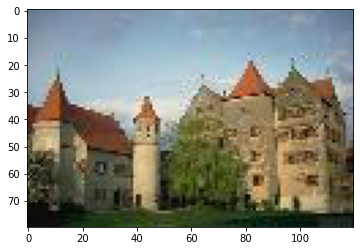

In [3]:
img_requete = image.imread('C:/Users/admin/Desktop/midvi s3/Image mining/im.jpeg')
plt.imshow(img_requete)

In [4]:
imreq = cv2.calcHist([img_requete],[0,1,2],None,[8,2,2],[0,180,0,256,0,256])
imreq = cv2.normalize(imreq,None).flatten()

In [5]:
def CBIR_Indexation():
    features=np.zeros([len(loaded_images),32])
    
    for i in range (len(loaded_images)):
        
        hist = cv2.calcHist([loaded_images[i]],[0,1,2],None,[8,2,2],[0,180,0,256,0,256])
        hist = cv2.normalize(hist,None).flatten()
        features[i]=hist
    return features

In [6]:
CBIR_Indexation()

array([[7.45446980e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.93968341e-02, 4.11517143e-01],
       [6.68261126e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.41337293e-01, 5.00868261e-01],
       [2.63173915e-02, 3.25504579e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.27085298e-01, 4.64017168e-02],
       ...,
       [4.53813314e-01, 0.00000000e+00, 0.00000000e+00, ...,
        4.18646960e-04, 8.24734494e-02, 4.24089372e-01],
       [5.53293288e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.99404117e-02, 7.64037222e-02],
       [9.43346471e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.01334751e-01, 4.16672491e-02]])

In [7]:
index_Matrix=CBIR_Indexation()
# Afficher la taille de la matrice de caractéristiques et qui doit étre de taille égale à Nombre d'images dans la base multiplié par nombre de caractéristiques
print (index_Matrix.shape)
print(index_Matrix)

(270, 32)
[[7.45446980e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.93968341e-02 4.11517143e-01]
 [6.68261126e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.41337293e-01 5.00868261e-01]
 [2.63173915e-02 3.25504579e-02 0.00000000e+00 ... 0.00000000e+00
  1.27085298e-01 4.64017168e-02]
 ...
 [4.53813314e-01 0.00000000e+00 0.00000000e+00 ... 4.18646960e-04
  8.24734494e-02 4.24089372e-01]
 [5.53293288e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  9.99404117e-02 7.64037222e-02]
 [9.43346471e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.01334751e-01 4.16672491e-02]]


In [8]:

import scipy.spatial.distance as dist

def CBIR_Recherche(Imreq,ind_Matrix):
    distances = {}
    for i in range(len(loaded_images)):
       
        distances[i]=dist.euclidean(Imreq,ind_Matrix[i])
        
        distance=dict(sorted(distances.items(),key=lambda x: x[1]))
    return distance

In [9]:
print(imreq)

distanes_CBIR=CBIR_Recherche(imreq,index_Matrix)

[1.6025232e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.8392156e-01
 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.9528335e-01 0.0000000e+00
 0.0000000e+00 0.0000000e+00 3.4766605e-01 3.8802015e-04 0.0000000e+00
 0.0000000e+00 3.3524942e-01 2.3281209e-02 0.0000000e+00 2.0565068e-02
 2.0565069e-01 3.1041612e-03 1.3192685e-02 3.5193428e-01 1.3076279e-01
 0.0000000e+00 9.1960780e-02 5.5525684e-01 3.0653592e-02 0.0000000e+00
 1.5326796e-01 3.0731195e-01]


In [10]:
result = distanes_CBIR.keys()
  
# Convert object to a list
data = list(result)
  
# Convert list to an array
arraydistance = np.array(data)
  
# print the numpy array
print(arraydistance)

[ 47  23   0  82  99  89 110 123 154 159 180  78 103  49  16 178  65 238
 222 163 168 136 151 183 165 207  72 148 153 175 202 142 209 251 191 145
 137  44  67 197  24 246 152 194   6 139  60 143 235  61  58 184 188 121
 161  11  33 198 138  79 196 199 174 241  26  57 164 167 160  20 195 187
 177 144 100 146 204 169 149  62 208 181  84 109 229  59 267  18   4 182
 193  10 265 166 173 186  56 190 200 215 155 179 129  81  75 216 232 244
 218 201 250 140 254 248 162 124  64 192  94 258   1 108 217 255  93 266
 227 203 176  97  95 211 150  86 185 125 205 170 172 233 141 249 234 122
 106  52  69   7 210  91 105  54 132 257 171 212  53 206 118 239 256 127
  39 134  21 228 268 131   5 213  41  50  22  77 133  12 247 101 117  51
 264 157  34  40 156 130  83  85   2 189 120 262  27 263  30 214  80   8
  17  13 259 135 230  92  46 113 252 231 245  36 114 243  98  45  66  43
 220 240 225  55  28 147  38 158  76  32  96  42  15  63  87 226 126   9
  88 269  14  37  74  68 102 111 221 219  31  29 24

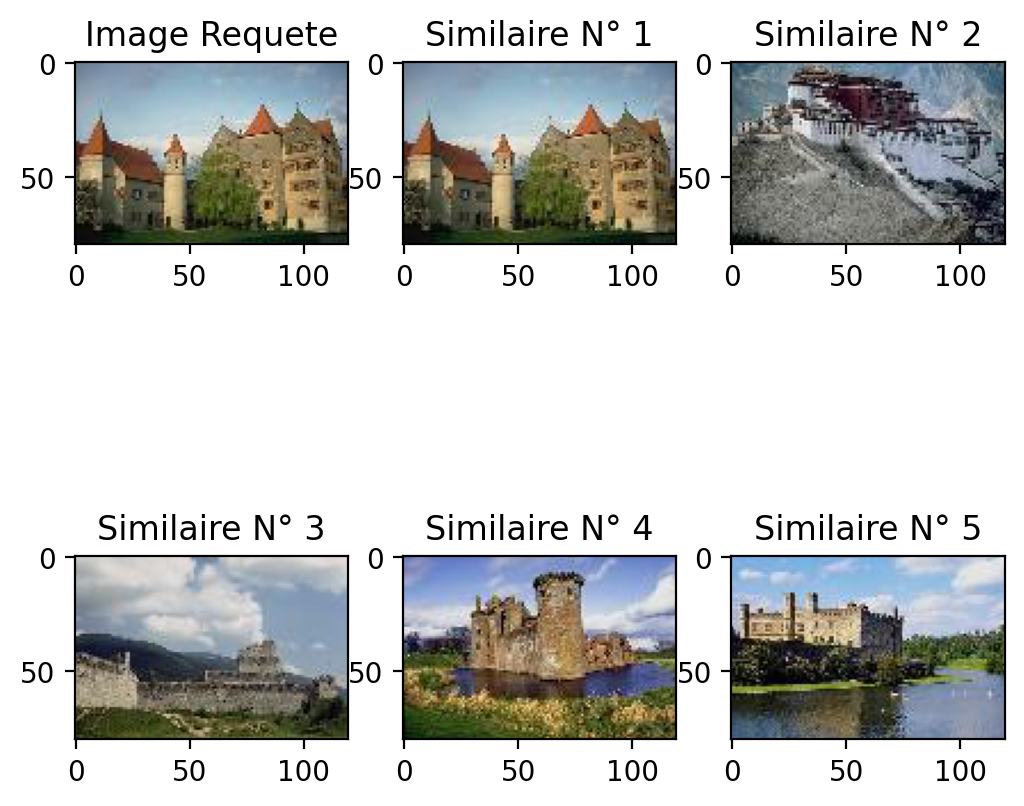

In [11]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[arraydistance[i]])
  ax1.set_title('Similaire N° %s' %(i+1))

In [12]:
features=np.zeros([len(loaded_images),32])
    
for i in range (len(loaded_images)):
        
    hist = cv2.calcHist([loaded_images[i]],[0,1,2],None,[8,2,2],[0,180,0,256,0,256])
    hist = cv2.normalize(hist,None).flatten()
    features[i]=hist

In [38]:
hist

array([9.43346471e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.89669311e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.17336372e-01, 1.00001390e-03, 0.00000000e+00, 0.00000000e+00,
       6.12341881e-01, 5.10673821e-01, 0.00000000e+00, 0.00000000e+00,
       2.98670828e-01, 3.41338098e-01, 3.33337986e-04, 9.03345942e-02,
       1.48668736e-01, 8.66678730e-03, 4.33339365e-03, 1.13668256e-01,
       5.66674583e-02, 3.33337986e-04, 5.10007106e-02, 7.30010197e-02,
       6.66675973e-04, 0.00000000e+00, 1.01334751e-01, 4.16672491e-02],
      dtype=float32)